<a href="https://colab.research.google.com/github/bongjunpyo/-/blob/main/%EC%8B%9D%EC%88%98%EC%9D%B8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 13.3 M

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.regression import *

from sklearn.preprocessing import LabelEncoder
from datetime import timedelta

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
url1 = 'https://raw.githubusercontent.com/chltj/kuku/main/train.csv'
url2 = 'https://raw.githubusercontent.com/chltj/kuku/main/test.csv'
train = pd.read_csv(url1)
test = pd.read_csv(url2)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [ ]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [ ]:
def process_date(df):
    df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d")
    df['년'] = df['일자'].dt.year
    df['월'] = df['일자'].dt.month
    df['일'] = df['일자'].dt.day
    return df



In [ ]:
train = process_date(train)
day_encoder = LabelEncoder()
train['요일'] = day_encoder.fit_transform(train['요일'])


In [ ]:
train['식사가능자'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']


In [ ]:
train.corr()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,년,월,일,식사가능자
요일,1.000000,0.004999,-0.210219,-0.447183,0.539062,0.028364,0.584193,0.292941,0.008706,-0.004325,0.005616,0.269119
본사정원수,0.004999,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.764078,0.244705,-0.020737,0.503771
본사휴가자수,-0.210219,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,0.129875,0.193627,-0.009210,-0.552661
본사출장자수,-0.447183,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,-0.109583,0.210877,0.144007,0.136389
본사시간외근무명령서승인건수,0.539062,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.181749,0.018316,-0.093606,0.309118
현본사소속재택근무자수,0.028364,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,0.571133,0.033586,-0.031583,-0.150393
중식계,0.584193,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,-0.078804,-0.154664,-0.097392,0.286810
석식계,0.292941,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,-0.194792,-0.127142,-0.185565,0.172373
년,0.008706,0.764078,0.129875,-0.109583,0.181749,0.571133,-0.078804,-0.194792,1.000000,-0.092612,-0.029843,0.306486
월,-0.004325,0.244705,0.193627,0.210877,0.018316,0.033586,-0.154664,-0.127142,-0.092612,1.000000,0.002120,0.006330


In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년,월,일,식사가능자
0,2016-02-01,3,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,2401.0
1,2016-02-02,4,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2,2378.0
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3,2365.0
3,2016-02-04,1,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4,2277.0
4,2016-02-05,0,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5,2142.0


<Axes: xlabel='요일', ylabel='석식계'>

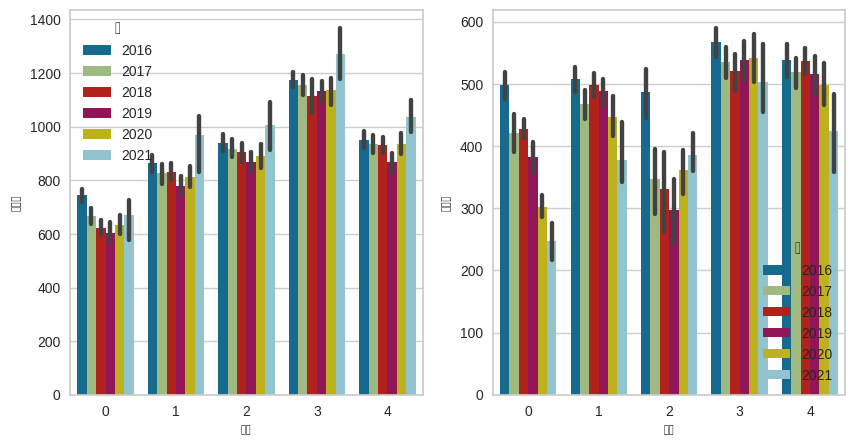

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='요일', y='중식계',  hue='년',data=train, ax=ax[0])
sns.barplot(x='요일', y='석식계',  hue='년',data=train, ax=ax[1])

<Axes: xlabel='월', ylabel='석식계'>

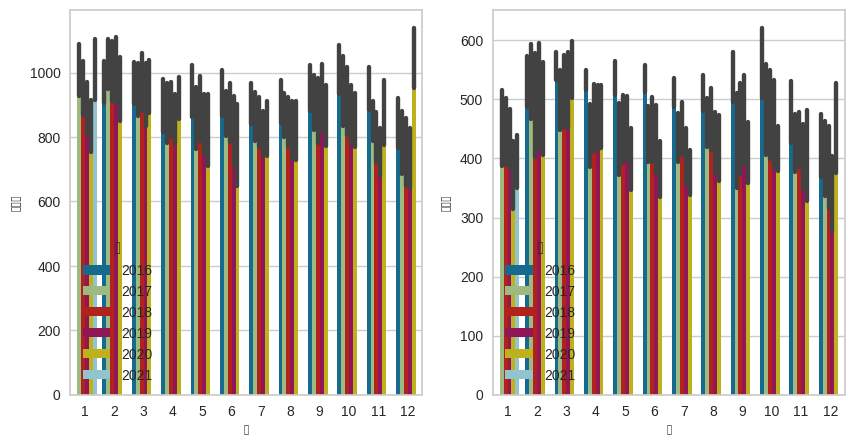

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='월', y='중식계',  hue='년',data=train, ax=ax[0])
sns.barplot(x='월', y='석식계',  hue='년',data=train, ax=ax[1])

<Axes: xlabel='일', ylabel='석식계'>

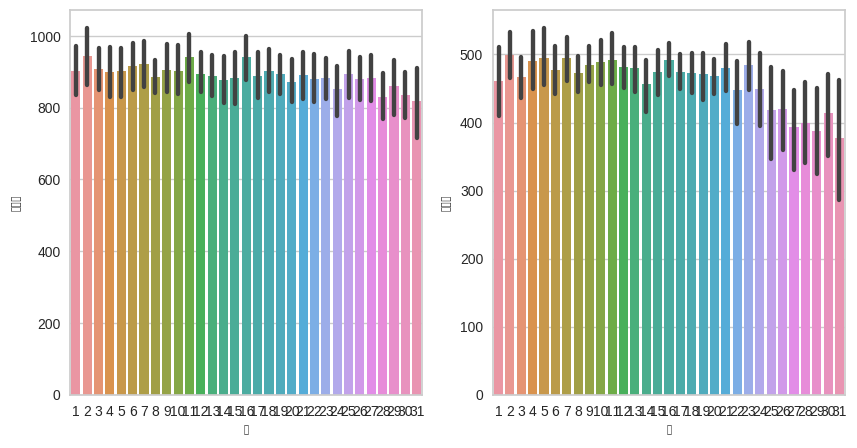

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='일', y='중식계', data=train, ax=ax[0])
sns.barplot(x='일', y='석식계', data=train, ax=ax[1])

In [ ]:
train['월평균중식계'] = 0
tmp = train.groupby('월').mean()['중식계']
tmp_k = tmp.keys(); tmp_v = tmp.values
for i in tmp_k:
    train['월평균중식계'][train['월'] == i] = tmp_v[i-1]

    train['월평균석식계'] = 0
tmp = train.groupby('월').mean()['석식계']
tmp_k = tmp.keys(); tmp_v = tmp.values
for i in tmp_k:
    train['월평균석식계'][train['월'] == i] = tmp_v[i-1]

In [ ]:
train['요일평균중식계'] = 0
tmp = train.groupby('요일').mean()['중식계'].values
for i in range(len(tmp)):
    train['요일평균중식계'][train['요일'] == i] = tmp[i]


    train['요일평균석식계'] = 0
tmp = train.groupby('요일').mean()['석식계'].values
for i in range(len(tmp)):
    train['요일평균석식계'][train['요일'] == i] = tmp[i]

In [ ]:
train['일평균중식계'] = 0
tmp = train.groupby('일').mean()['중식계'].values
for i in range(len(tmp)):
    train['일평균중식계'][train['일'] == i] = tmp[i]


    train['일평균석식계'] = 0
tmp = train.groupby('일').mean()['석식계'].values
for i in range(len(tmp)):
    train['일평균석식계'][train['일'] == i] = tmp[i]

In [ ]:
test = process_date(test)
day_encoder = LabelEncoder()
test['요일'] = day_encoder.fit_transform(test['요일'])

In [ ]:
test['식사가능자'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,년,월,일,식사가능자
0,2021-01-27,2,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,1,27,2355.0
1,2021-01-28,1,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2021,1,28,2319.0
2,2021-01-29,0,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2021,1,29,2170.0
3,2021-02-01,3,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2021,2,1,2340.0
4,2021-02-02,4,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2021,2,2,2362.0


In [ ]:
def make_dow_avg(df_test, df_prev):
    dow_avg_ln = df_prev.groupby('요일').mean()['중식계']
    dow_avg_dn = df_prev.groupby('요일').mean()['석식계']

    df_test['요일평균중식계'] = 0
    tmp = dow_avg_ln.values
    for i in range(len(tmp)):
        df_test['요일평균중식계'][df_test['요일'] == i] = tmp[i]

    df_test['요일평균석식계'] = 0
    tmp = dow_avg_dn.values
    for i in range(len(tmp)):
        df_test['요일평균석식계'][df_test['요일'] == i] = tmp[i]

    return df_test

def make_month_avg(df_test, df_prev):
    month_avg_ln = df_prev.groupby('월').mean()['중식계']
    month_avg_dn = df_prev.groupby('월').mean()['석식계']

    df_test['월평균중식계'] = 0
    tmp = month_avg_ln
    tmp_k = tmp.keys(); tmp_v = tmp.values
    for i in tmp_k:
        df_test['월평균중식계'][df_test['월'] == i] = tmp_v[i-1]

    df_test['월평균석식계'] = 0
    tmp = month_avg_dn
    tmp_k = tmp.keys(); tmp_v = tmp.values
    for i in tmp_k:
        df_test['월평균석식계'][df_test['월'] == i] = tmp_v[i-1]

    return df_test

def make_day_avg(df_test, df_prev):
    day_avg_ln = df_prev.groupby('일').mean()['중식계']
    day_avg_dn = df_prev.groupby('일').mean()['석식계']

    df_test['일평균중식계'] = 0
    tmp = day_avg_ln.values
    for i in range(len(tmp)):
        df_test['일평균중식계'][df_test['일'] == i] = tmp[i]

    df_test['일평균석식계'] = 0
    tmp = day_avg_dn.values
    for i in range(len(tmp)):
        df_test['일평균석식계'][df_test['일'] == i] = tmp[i]

    return df_test

In [ ]:
train.corr()[['중식계','석식계']]

,중식계,석식계
요일,0.584193,0.292941
본사정원수,-0.115529,-0.173852
본사휴가자수,-0.391975,-0.316894
본사출장자수,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.535611,0.571168
현본사소속재택근무자수,0.076509,-0.057534
중식계,1.000000,0.508287
석식계,0.508287,1.000000
년,-0.078804,-0.194792
월,-0.154664,-0.127142


In [ ]:
X_train_ln = train[[ '월', '일', '년','본사시간외근무명령서승인건수','요일평균중식계','월평균중식계','요일평균석식계', '식사가능자', '중식계','석식계']]

In [ ]:
reg = setup(session_id=1,
            data=X_train_ln,
            target='중식계',
            normalize = True)

,Description,Value
0,Session id,1
1,Target,중식계
2,Target type,Regression
3,Original data shape,"(1205, 10)"
4,Transformed data shape,"(1205, 10)"
5,Transformed train set shape,"(843, 10)"
6,Transformed test set shape,"(362, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(sort='mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,70.7582,8954.2961,93.7147,0.7960,0.1183,0.0864,1.7960
gbr,Gradient Boosting Regressor,73.2727,9455.2377,96.5006,0.7833,0.1212,0.0896,0.2630
rf,Random Forest Regressor,74.6824,9930.5499,99.0382,0.7714,0.1250,0.0913,0.3910
et,Extra Trees Regressor,74.9813,10367.7657,100.9863,0.7618,0.1252,0.0910,0.2660
lightgbm,Light Gradient Boosting Machine,76.1470,10252.4187,100.6715,0.7621,0.1269,0.0929,0.2300
xgboost,Extreme Gradient Boosting,76.2917,10295.3694,100.7981,0.7629,0.1268,0.0930,0.2310
knn,K Neighbors Regressor,82.8997,12337.5125,109.7510,0.7204,0.1337,0.0996,0.0460
huber,Huber Regressor,83.3823,13402.3455,114.5637,0.6924,0.1417,0.1014,0.0590
lar,Least Angle Regression,84.3913,13236.1408,114.0328,0.6965,0.1416,0.1035,0.0380
lr,Linear Regression,84.3913,13236.1408,114.0328,0.6965,0.1416,0.1035,0.0370


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
cb_l = create_model('catboost', eval_metric='MAE')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,93.8788,16153.5055,127.0964,0.6743,0.1742,0.1189
1,69.9666,8355.3613,91.4077,0.7580,0.1007,0.0779
2,62.2539,6739.0963,82.0920,0.8399,0.1091,0.0799
3,69.2757,8470.7317,92.0366,0.8207,0.1258,0.0907
4,64.2588,6370.6685,79.8165,0.8386,0.0950,0.0744
5,69.0443,9622.2288,98.0930,0.7871,0.1243,0.0853
6,72.3375,9817.8206,99.0849,0.7787,0.1266,0.0887
7,65.4213,6324.8504,79.5289,0.8070,0.0921,0.0758
8,67.4881,8273.8498,90.9607,0.8300,0.1004,0.0770


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pred_dn = predict_model(cb_l)
final_model_l = finalize_model(cb_l )
final_model_l

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,66.9911,8423.2536,91.7783,0.8052,0.1196,0.0856


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['월', '일', '년', '본사시간외근무명령서승인건수',
                                             '요일평균중식계', '월평균중식계', '요일평균석식계',
                                             '월평균석식계', '식사가능자', '석식계'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7925597c2d70>)])

In [ ]:
evaluate_model(final_model_l)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
X_train_dn = train[[ '월', '년', '일', '본사시간외근무명령서승인건수','요일평균석식계','월평균석식계','일평균석식계', '식사가능자', '중식계','석식계']]

In [ ]:
re= setup(session_id=2,
            data=X_train_dn,
            target='석식계',
            normalize = True)

,Description,Value
0,Session id,2
1,Target,석식계
2,Target type,Regression
3,Original data shape,"(1205, 10)"
4,Transformed data shape,"(1205, 10)"
5,Transformed train set shape,"(843, 10)"
6,Transformed test set shape,"(362, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best2 = compare_models(sort='mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,52.8646,5921.9636,76.5978,0.6838,0.8697,0.1138,0.2760
catboost,CatBoost Regressor,54.0826,6085.2822,77.3485,0.6794,0.8967,0.1168,1.7800
rf,Random Forest Regressor,54.1244,6278.3307,78.6144,0.6696,0.8897,0.1174,0.4070
lightgbm,Light Gradient Boosting Machine,55.1153,6251.3351,78.3591,0.6695,0.8994,0.1213,0.2900
xgboost,Extreme Gradient Boosting,56.2937,7009.0186,83.1804,0.6297,0.8701,0.1229,0.2420
gbr,Gradient Boosting Regressor,56.8986,6316.1767,79.0019,0.6642,0.9422,0.1216,0.1730
huber,Huber Regressor,62.1154,10407.6290,100.5732,0.4664,1.0851,0.1155,0.0800
knn,K Neighbors Regressor,63.5562,8742.7294,93.0882,0.5353,1.0106,0.1353,0.0740
par,Passive Aggressive Regressor,63.8775,10550.6695,101.2754,0.4588,1.0837,0.1195,0.0510
llar,Lasso Least Angle Regression,66.5626,9695.6380,97.6243,0.4934,1.0612,0.1291,0.0340


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
cb_d = create_model('et', criterion='friedman_mse')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,56.4713,8126.1370,90.1451,0.6331,1.1417,0.1282
1,50.4404,4504.2271,67.1135,0.5825,0.1542,0.1171
2,53.0262,5960.8918,77.2068,0.6975,0.9370,0.1006
3,55.0449,5680.0481,75.3661,0.6411,0.6380,0.1205
4,48.5693,5840.2146,76.4213,0.6763,0.8646,0.1059
5,49.1458,4097.3367,64.0104,0.7301,0.7227,0.1072
6,56.7274,5940.6745,77.0758,0.7402,1.0040,0.1361
7,52.6236,5201.3950,72.1207,0.7300,0.8656,0.1161
8,56.5455,6719.3165,81.9714,0.6787,0.9699,0.1190


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pred_dn = predict_model(cb_d)
final_model_d = finalize_model(cb_d )
final_model_d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,51.0433,5167.3963,71.8846,0.7341,0.8741,0.1178


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['월', '년', '일', '본사시간외근무명령서승인건수',
                                             '요일평균석식계', '월평균석식계', '일평균석식계',
                                             '식사가능자', '중식계'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(criterion='friedman_mse', n_jobs=-1,
                                     random_state=2))])